In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Build AlexNet model
def build_alexnet(input_shape = (32, 32, 3), num_classes = 10):
    """Builds the AlexNet model.

    Args:
        input_shape: Tuple, the shape of the input tensor.
        num_classes: Int, number of output classes.

    Returns:
        A compiled AlexNet model.
    """
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same', input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'),

        # Convolutional Layer 2
        Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same'),
        Activation('relu'),
        MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'),

        # Convolutional Layer 3
        Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), padding = 'same'),
        Activation('relu'),

        # Flatten layer
        Flatten(),

        # Fully Connected Layer 1
        Dense(units = 256, activation = 'relu'),
        Dropout(0.4),

        # Fully Connected Layer 2
        Dense(units = 128, activation = 'relu'),
        Dropout(0.4),

        # Output Layer
        Dense(units = num_classes, activation = 'softmax')
    ])
    model.summary()
    
    return model

In [3]:
# Data preprocessing
def preprocess_data():
    """Loads and preprocesses the CIFAR-10 dataset.

    Returns:
        Tuple of preprocessed training and testing data.
    """
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize images
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    return (x_train, y_train), (x_test, y_test)

In [4]:
# Training and evaluation
def train_and_evaluate(model: tf.keras.models.Model, x_train, y_train, x_test, y_test, epochs: int = 10, batch_size: int = 32):
    """Trains and evaluates the model.

    Args:
        model: The AlexNet model to train.
        x_train: Training data.
        y_train: Training labels.
        x_test: Testing data.
        y_test: Testing labels.
        epochs: Number of training epochs.
        batch_size: Batch size for training.

    Returns:
        Training history object.
    """
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    history = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                        epochs = epochs, batch_size = batch_size)
    return history

In [5]:
# Plot training results
def plot_training_results(history):
    """Plots training accuracy and loss curves.

    Args:
        history: Training history object from model.fit().
    """
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

c:\Users\nguye\anaconda3\envs\ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,224,842 (8.49 MB)

 Trainable params: 2,224,842 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3179 - loss: 1.8202 - val_accuracy: 0.5828 - val_loss: 1.1714
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5766 - loss: 1.1965 - val_accuracy: 0.6501 - val_loss: 0.9973
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6603 - loss: 0.9762 - val_accuracy: 0.6825 - val_loss: 0.9058
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7138 - loss: 0.8329 - val_accuracy: 0.7047 - val_loss: 0.8483
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7418 - loss: 0.7428 - val_accuracy: 0.6942 - val_loss: 0.8863
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7711 - loss: 0.6601 - val_accuracy: 0.7204 - val_loss: 0.8058
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7984 - loss: 0.5841 - val_accuracy: 0.7192 - val_loss: 0.8587
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8144 -

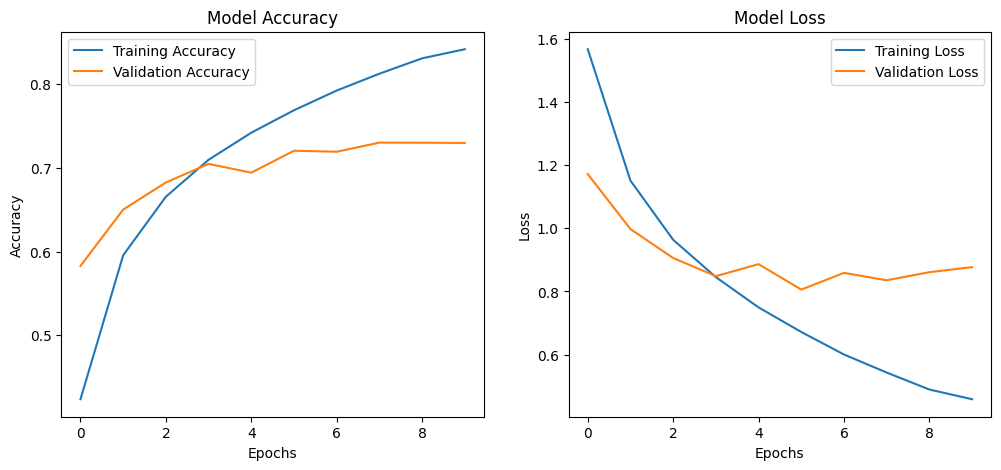

In [6]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = preprocess_data()
# Build model
alexnet_model = build_alexnet()
# Train and evaluate
history = train_and_evaluate(alexnet_model, x_train, y_train, x_test, y_test)
# Plot results
plot_training_results(history)